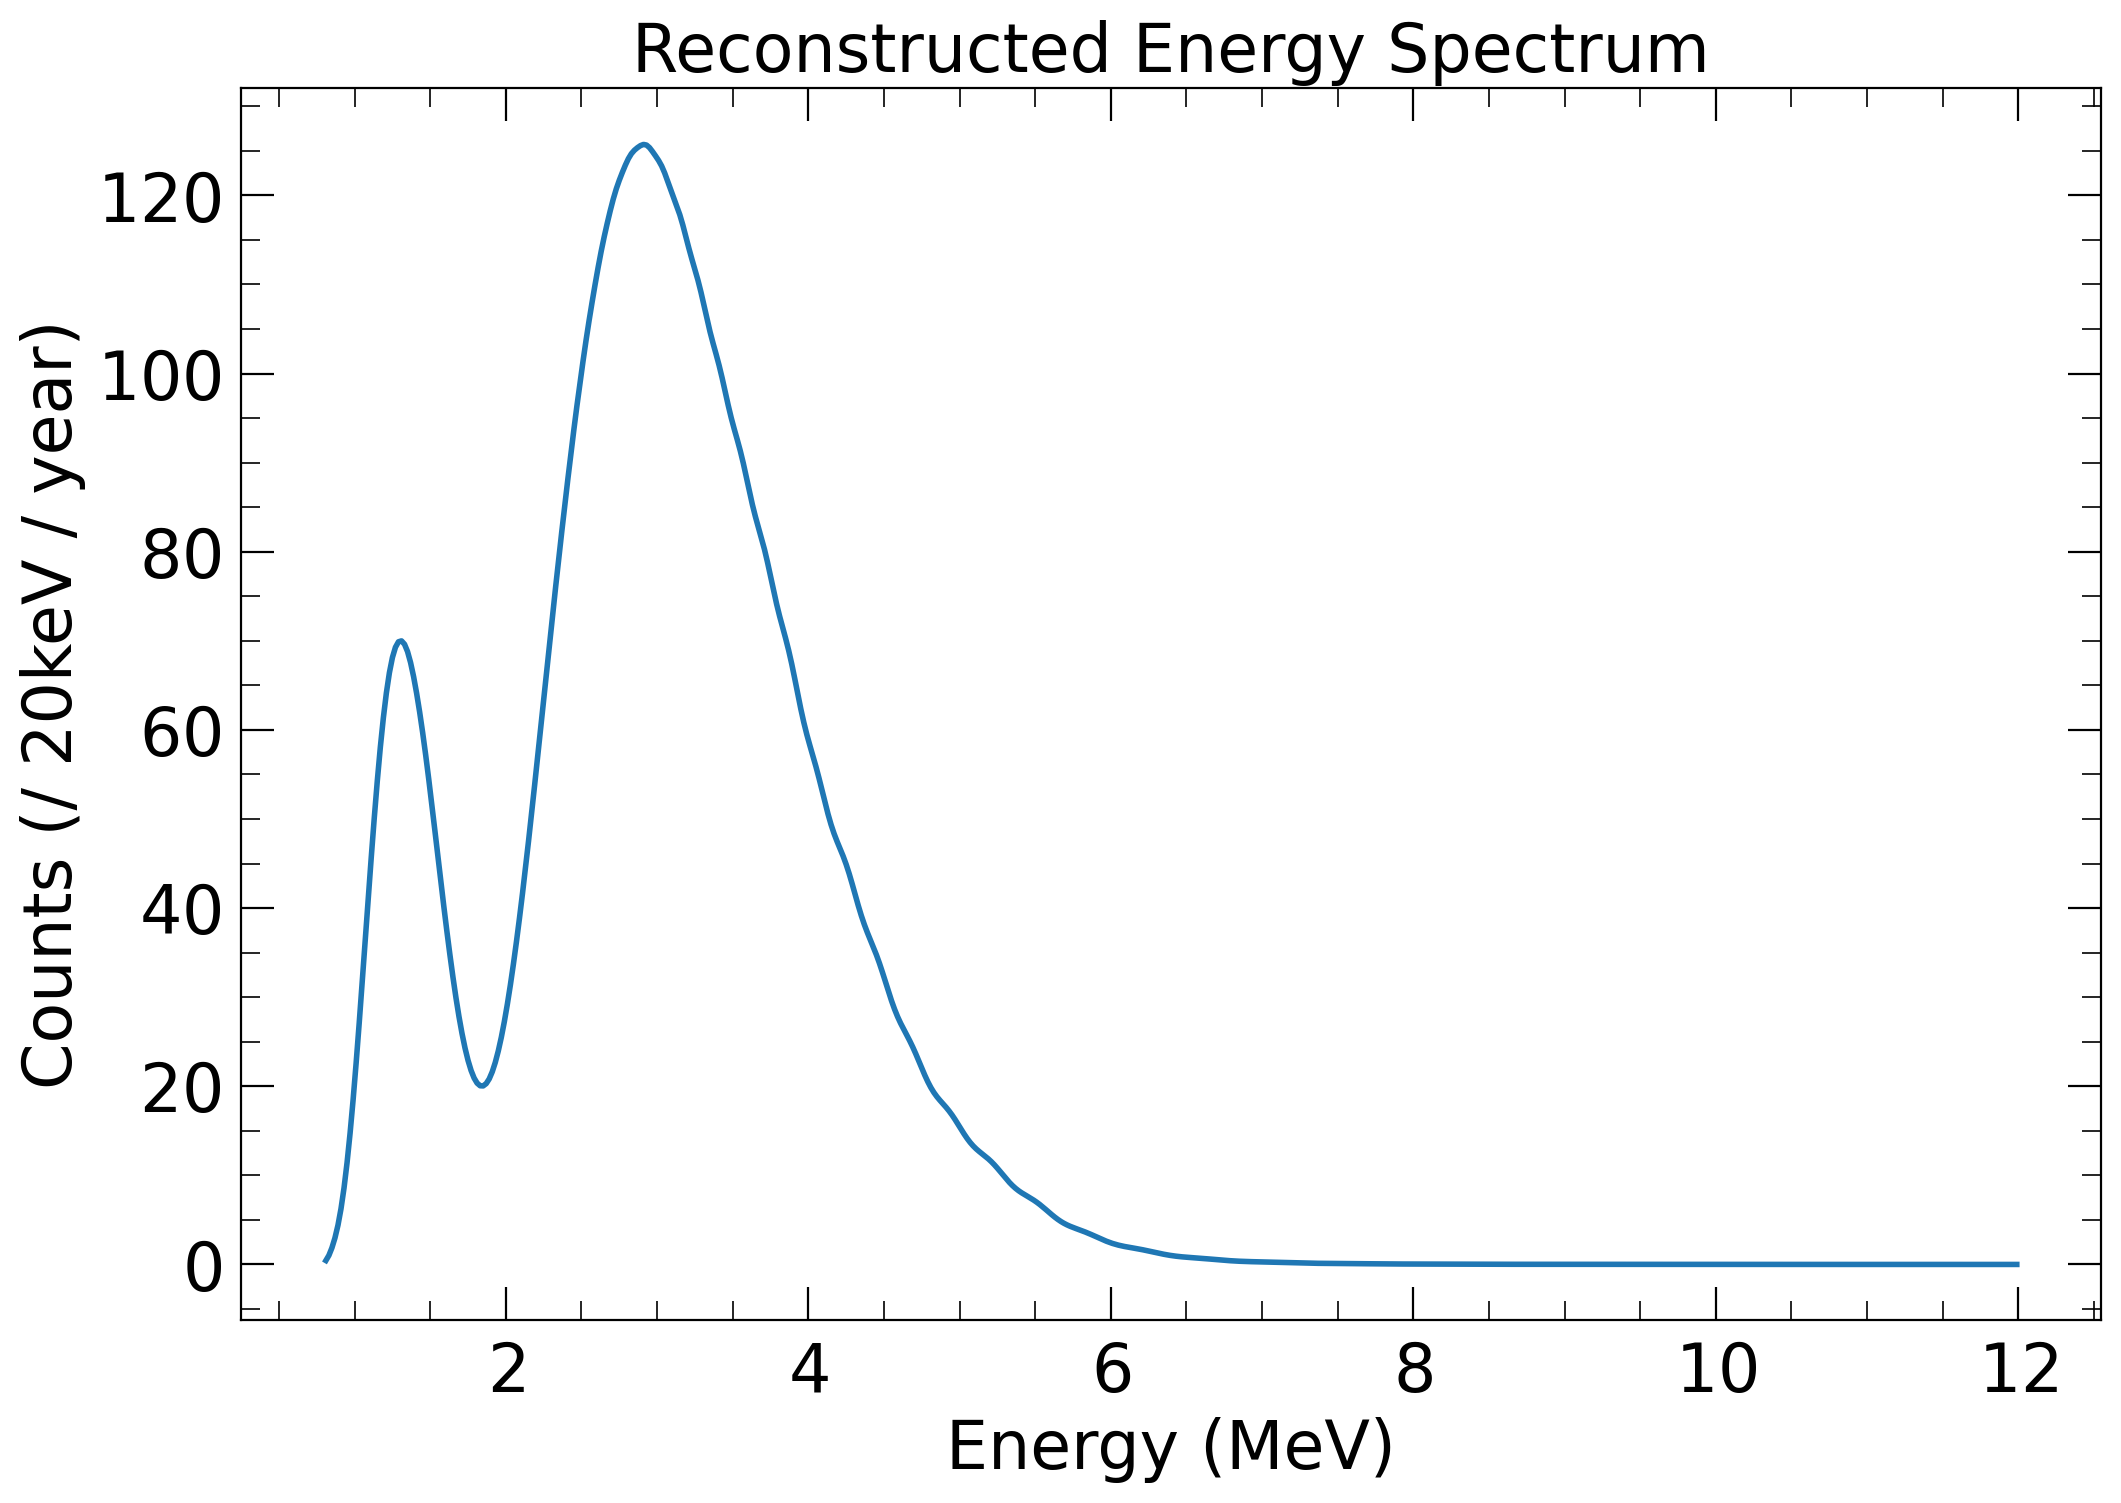

In [4]:
from fitter.src.fitter.reactor.reactor_expected import ReactorExpected
import matplotlib.pyplot as plt
import torch
from fitter.src.fitter.config import ReactorConfig as rc

plt.style.use("fitter/lib/Paper.mplstyle")
rc.L = torch.tensor([150 * 1000])
rc.reactor_power_GW = torch.tensor([100])
reactor = ReactorExpected(
    n_E_nu_bins=5600,  # 默认对应0.002 MeV步长 (13.0-1.8)/5600≈0.002
    n_E_dep_bins=5600,  # 默认对应0.002 MeV步长 (12.0-0.8)/5600≈0.002
    n_E_d_bins=560,
    n_E_p_bins=560,
)

E_p_spectrum = reactor.get_E_p_spectrum()
E_p_spectrum = E_p_spectrum.numpy()

plt.style.use("fitter/lib/Paper.mplstyle")
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(reactor.E_p, E_p_spectrum)
ax.set_xlabel("Energy (MeV)")
ax.set_ylabel((f"Counts (/ 20keV / year)"))
ax.set_title("Reconstructed Energy Spectrum")
plt.show()

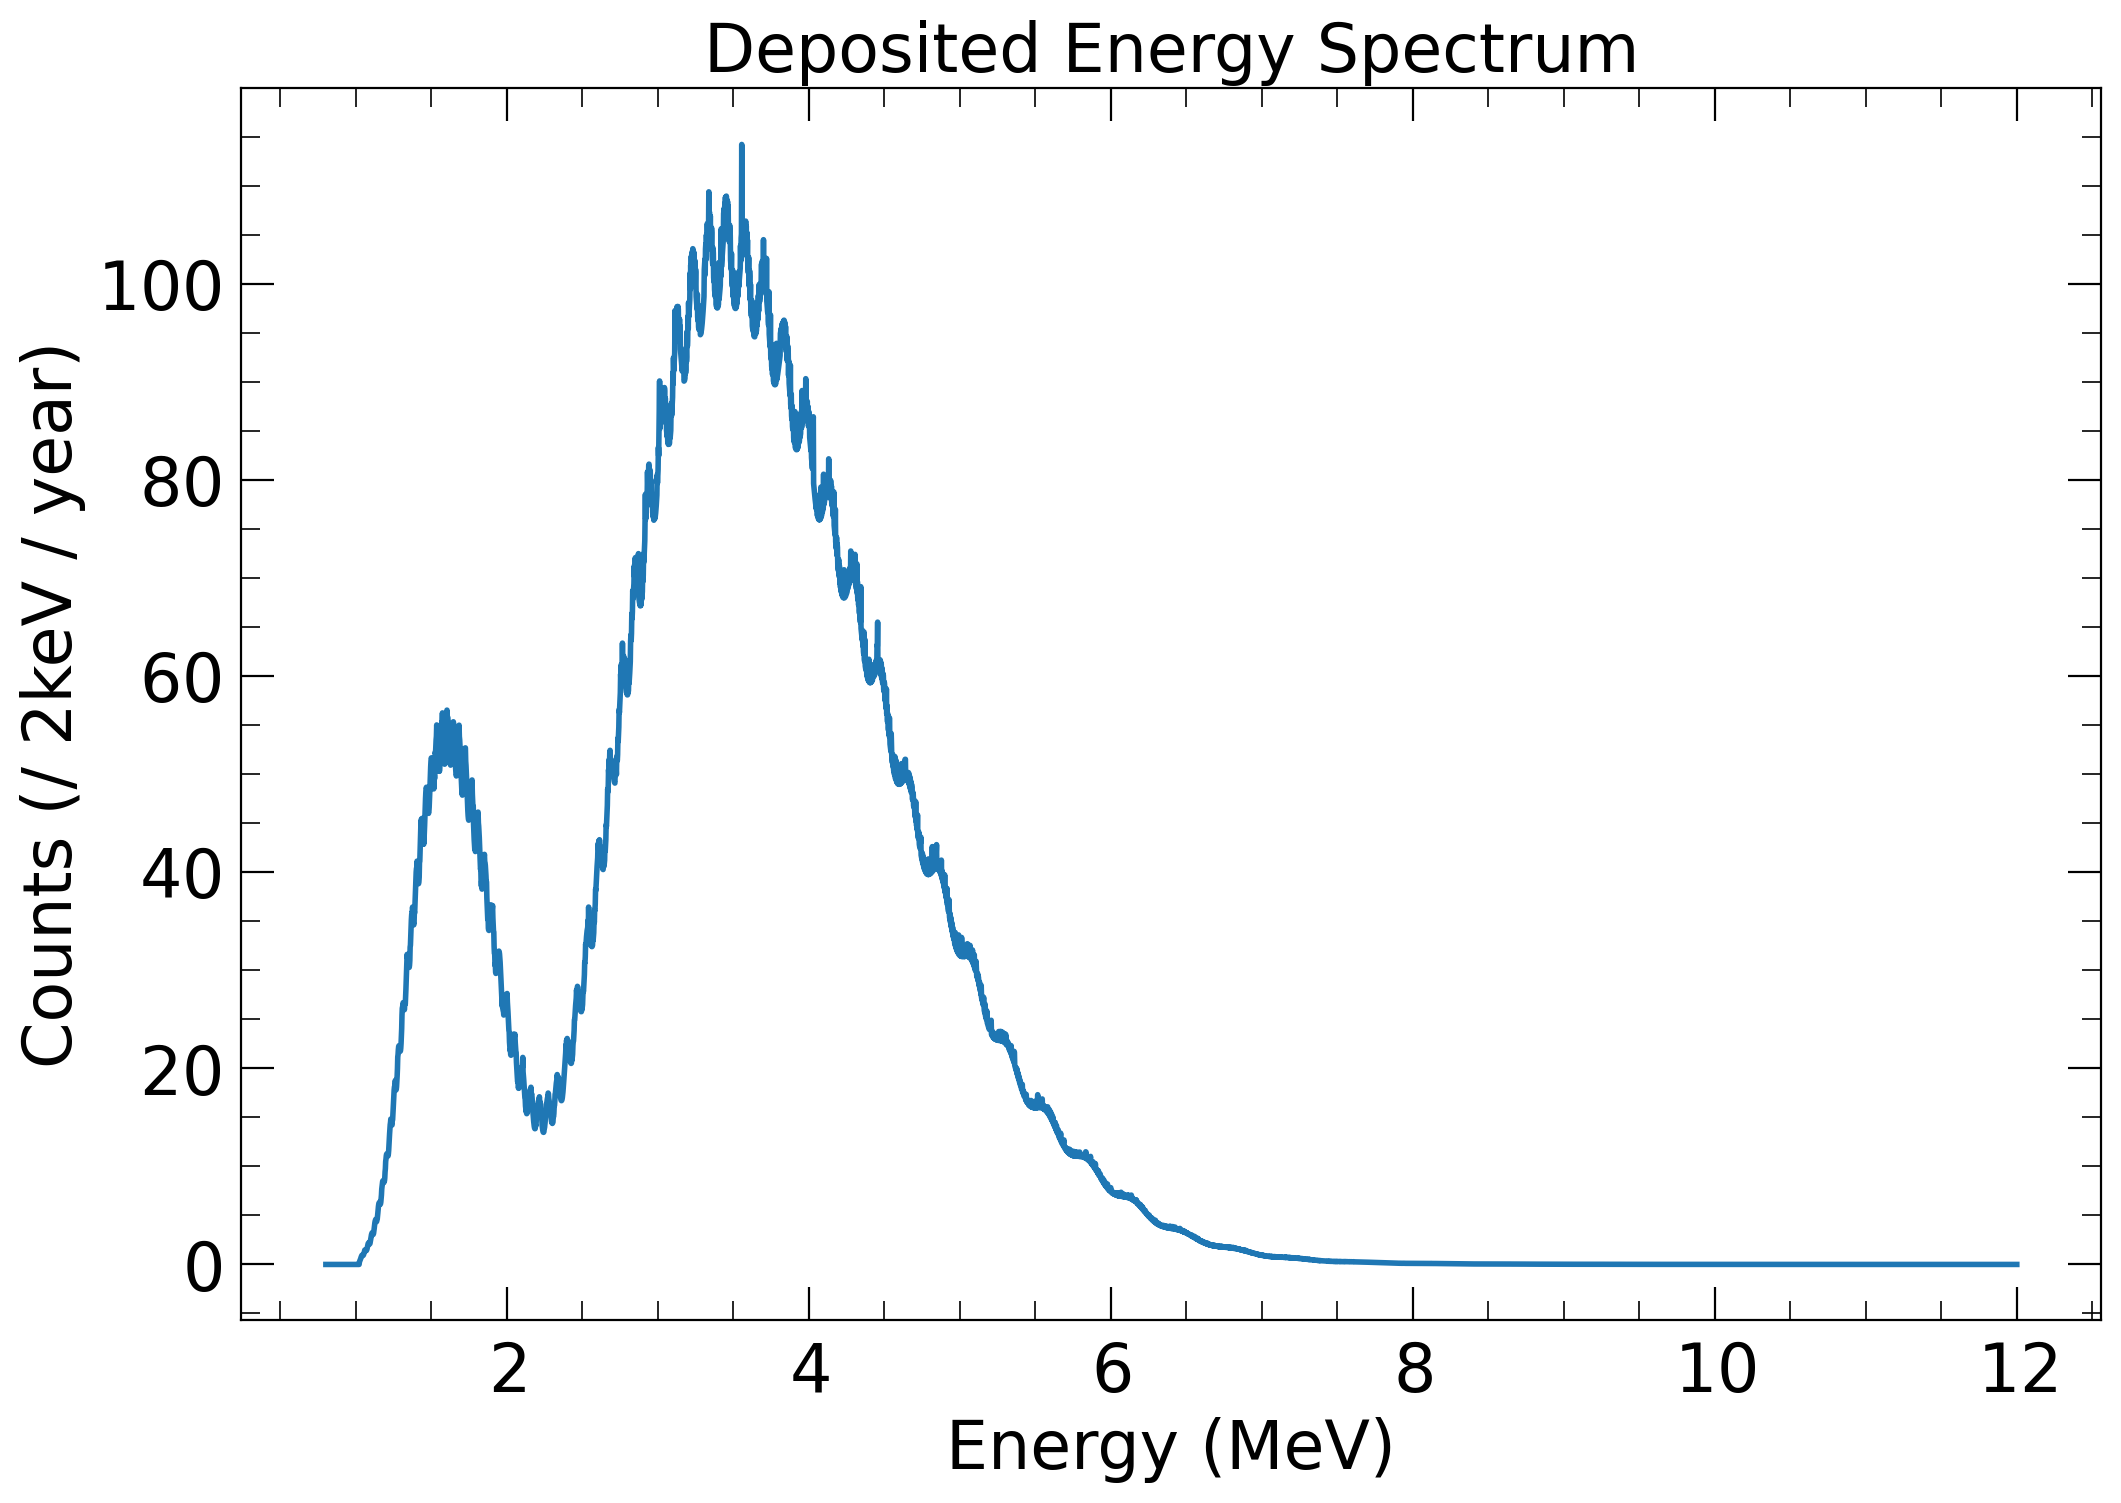

In [2]:
from fitter.src.fitter.reactor.reactor_expected import ReactorExpected
import matplotlib.pyplot as plt

plt.style.use("fitter/lib/Paper.mplstyle")
reactor = ReactorExpected(
    n_E_nu_bins=5600,  # 默认对应0.002 MeV步长 (13.0-1.8)/5600≈0.002
    n_E_dep_bins=5600,  # 默认对应0.002 MeV步长 (12.0-0.8)/5600≈0.002
    n_E_d_bins=560,
    n_E_p_bins=560,
)

E_dep_spectrum = reactor.get_E_dep_spectrum() * 3600 * 24 * 334.812
E_dep_spectrum = E_dep_spectrum.numpy()


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(reactor.E_dep, E_dep_spectrum)
ax.set_xlabel("Energy (MeV)")
ax.set_ylabel(f"Counts (/ 2keV / year)")
ax.set_title("Deposited Energy Spectrum")
plt.show()

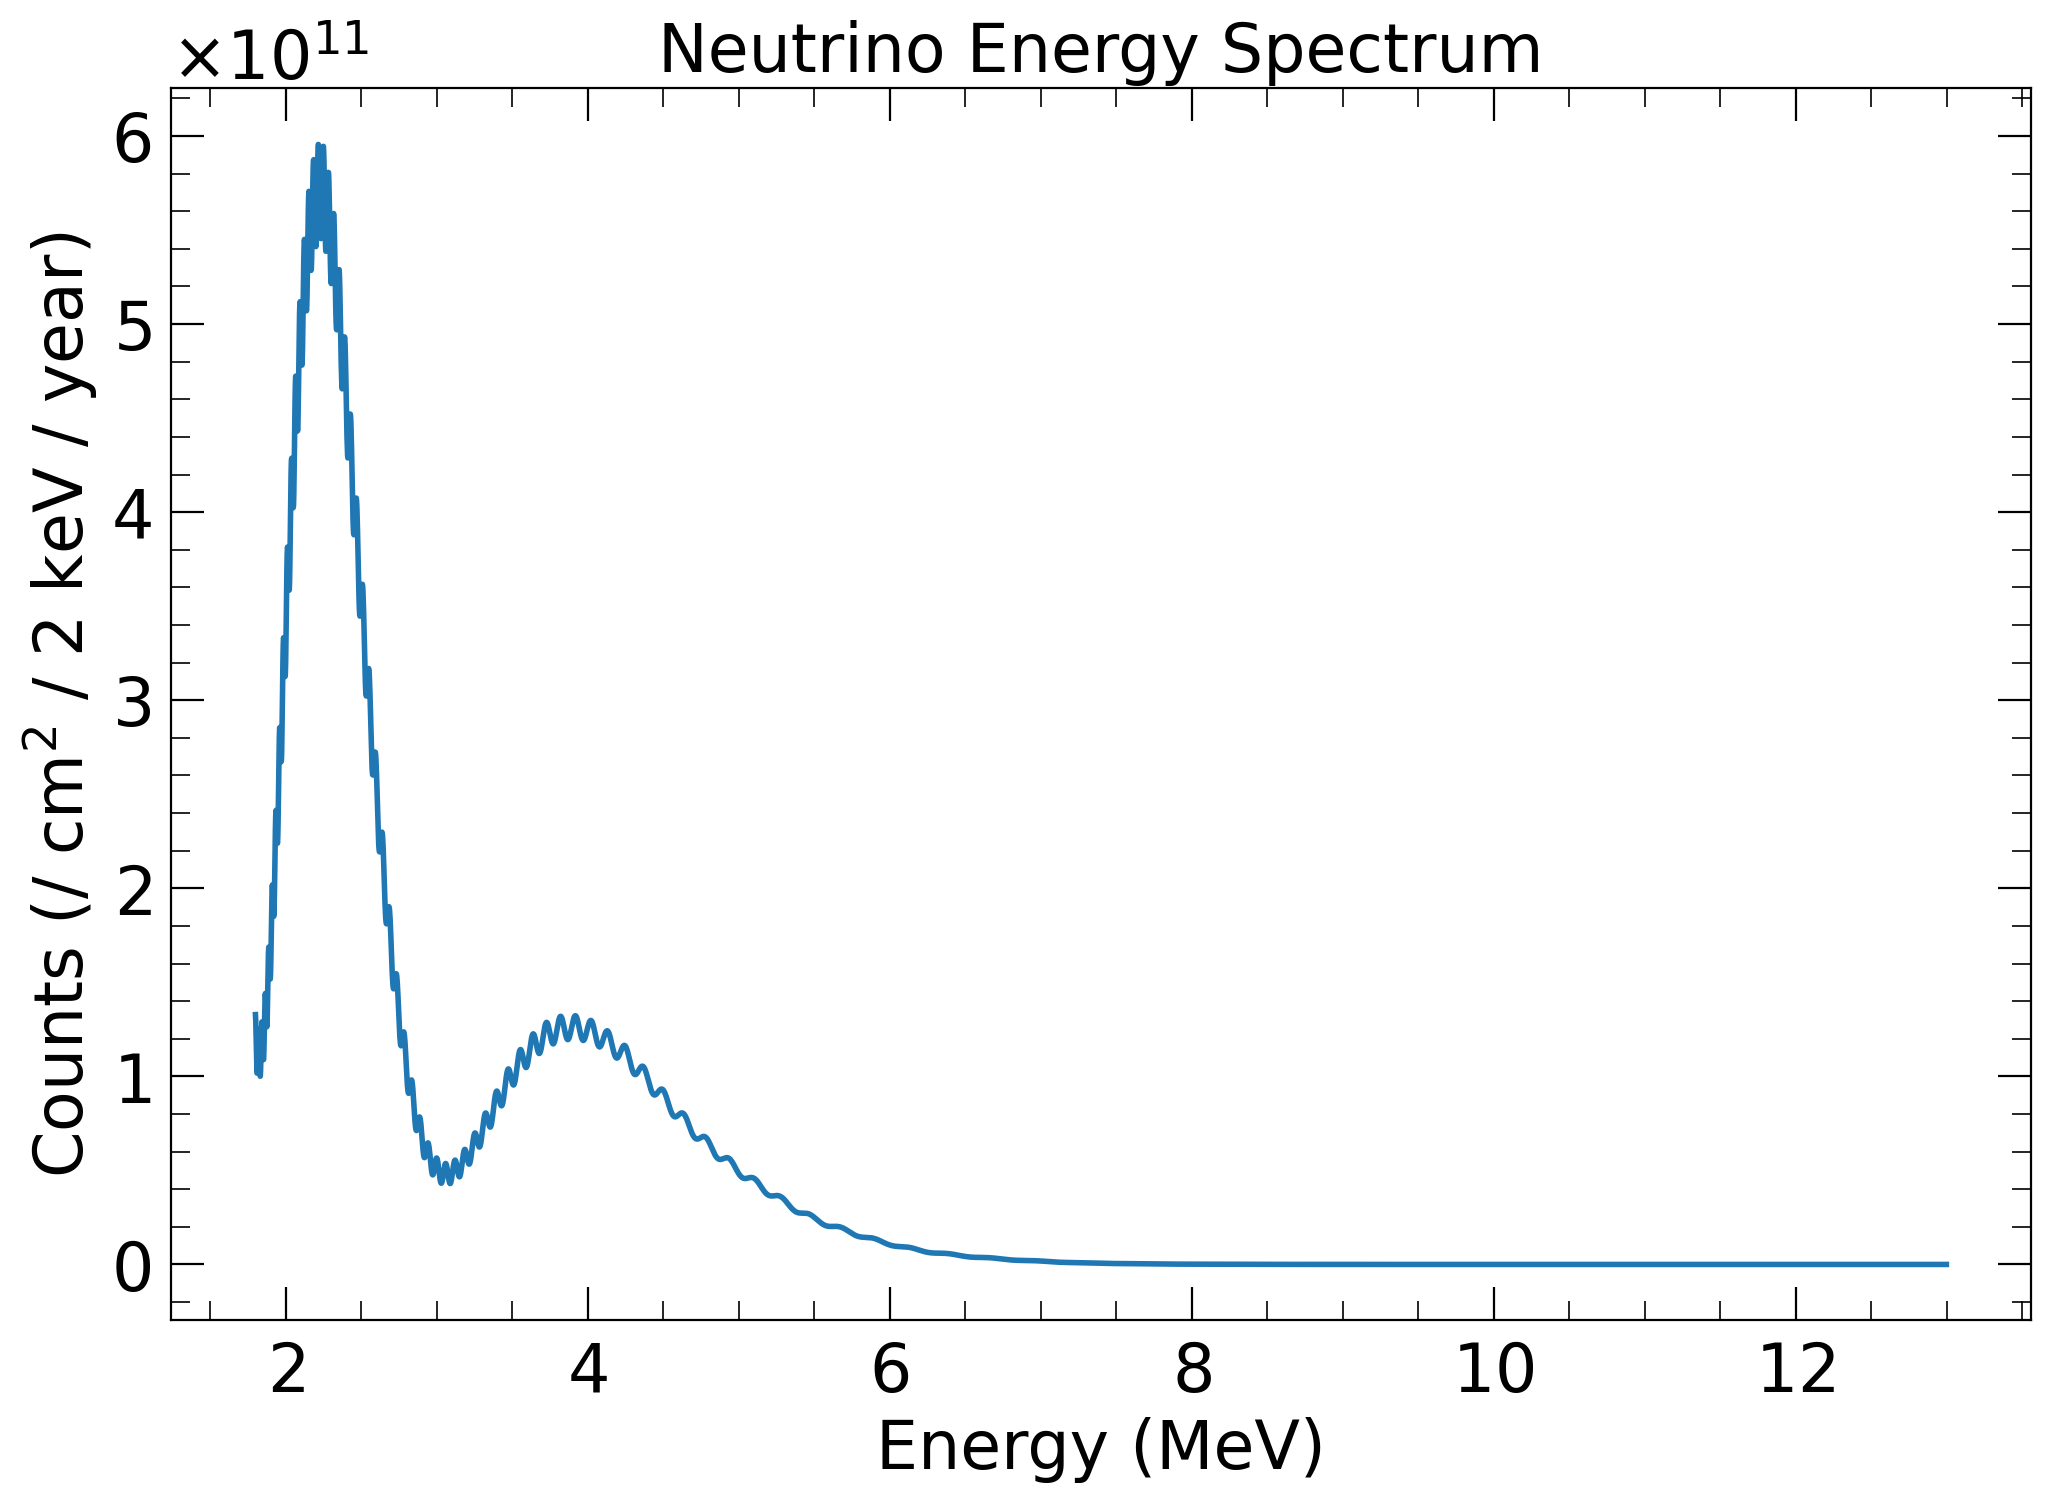

In [3]:
from fitter.src.fitter.reactor.reactor_expected import ReactorExpected
import matplotlib.pyplot as plt

plt.style.use("fitter/lib/Paper.mplstyle")
reactor = ReactorExpected(
    n_E_nu_bins=5600,  # 默认对应0.002 MeV步长 (13.0-1.8)/5600≈0.002
    n_E_dep_bins=5600,  # 默认对应0.002 MeV步长 (12.0-0.8)/5600≈0.002
    n_E_d_bins=560,
    n_E_p_bins=560,
)
E_nu_spectrum = reactor.get_reactor_nu_arrival() * 3600 * 24 * 334.812

E_nu_spectrum = E_nu_spectrum.numpy()

plt.style.use("fitter/lib/Paper.mplstyle")
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(reactor.E_nu, E_nu_spectrum)
ax.set_xlabel("Energy (MeV)")
ax.set_ylabel(f"Counts (/ $\\mathrm{{cm}}^2$ / 2 keV / year)")
ax.set_title("Neutrino Energy Spectrum")
plt.show()

In [3]:
import torch
import numpy as np
from fitter.src.fitter.reactor.reactor_expected import ReactorExpected
import matplotlib.pyplot as plt

reactor = ReactorExpected(
    n_E_nu_bins=5600,  # 默认对应0.002 MeV步长 (13.0-1.8)/5600≈0.002
    n_E_dep_bins=5600,  # 默认对应0.002 MeV步长 (12.0-0.8)/5600≈0.002
    n_E_d_bins=560,
    n_E_p_bins=560,
)

print("正在计算响应矩阵...")
cdf_matrix = reactor.normal_cdf_vectorized()

# 转换为numpy数组用于绘图
response_np = cdf_matrix.cpu().numpy()

# 获取能量轴
E_d_centers = reactor.E_d.cpu().numpy()  # 沉积能量中心值
E_p_centers = reactor.E_p.cpu().numpy()  # 重建能量中心值

print(f"响应矩阵形状: {response_np.shape}")
print(f"沉积能量范围: {E_d_centers.min():.3f} - {E_d_centers.max():.3f} MeV")
print(f"重建能量范围: {E_p_centers.min():.3f} - {E_p_centers.max():.3f} MeV")

正在计算响应矩阵...
响应矩阵形状: (560, 5600)
沉积能量范围: 0.810 - 11.990 MeV
重建能量范围: 0.810 - 11.990 MeV


In [1]:
from iminuit import Minuit
from fitter.src.fitter.analysis.fitter import Fitter
import psutil
import os
import time
import torch
from fitter.src.fitter.config import GlobalConfig as gcfg

torch.set_num_interop_threads(1)
torch.set_num_threads(1)

start_time = time.perf_counter()
process = psutil.Process(os.getpid())
initial_cpu = process.cpu_times()
gseed = 1  # 0 for Asimov >0 for toy
year = 1  # 1年统计量
# gcfg.use_poisson = True  # 是否使用泊松分布
# if gseed < 0:
#     print("Seed must be greater than 0")
#     exit()

fitter = Fitter(year)
fitter.get_obs_spectrum(gseed)

# fitter.initial_params_inverted对应逆序拟合，fitter.initial_params_normal对应正序拟合
m = Minuit(fitter.chi2, fitter.NO_params_NO, name=fitter.names)

m.tol = 0.01
# m.fixed["dmsq31"] = True
results = m.migrad()
display(results)

/cvmfs/gastpc.ihep.ac.cn/linux-ubuntu2404-x86_64_v3-gcc1330/Release/J24.1.2/external/linux-ubuntu24.04-x86_64_v3/gcc-13.3.0/python-venv-1.0-qspfwwiproypir6felddagikgsmdfood/lib/python3.11/site-packages/torch/utils/_device.py:106: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  return func(*args, **kwargs)
/cvmfs/gastpc.ihep.ac.cn/linux-ubuntu2404-x86_64_v3-gcc1330/Release/J24.1.2/external/linux-ubuntu24.04-x86_64_v3/gcc-13.3.0/python-venv-1.0-qspfwwiproypir6felddagikgsmdfood/lib/python3.11/site-packages/torch/utils/_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Parameters used to generate data:
dmsq31:  0.0025303
dmsq21:  7.53e-05
sinsq12:  0.307
sinsq13:  0.0219


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 146.9                      │             Nfcn = 1672              │
│ EDM = 1.15e-07 (Goal: 2e-05)     │           time = 14.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name           │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ dmsq31         │ 2.547e-3  │ 0.020e-3  │            │            │         │         │       │
│ 1 │ sinsq12        │   0.303   │   0.005   │            │            │         │         │       │
│ 2 │ dmsq21         │ 75.28e-6  │  0.12e-6  │            │            │         │         │       │
│ 3 │ sinsq13        │  21.9e-3  │  0.7e-3   │            │            │         │         │       │
│ 4 │ alpha_RC       │  -0.002   │   0.010   │            │            │         │         │       │
│ 5 │ alpha_reactor1 │  -0.000   │   0.008   │            │            │         │         │       │
│ 6 │ alpha_reactor2 │  -0.000   │   0.008   │            │            │         │         │       │
│ 7 │ alpha_reactor3 │  -0.000   │   0.008   │            │            │         │         │       │
│ 8 │ alpha_reactor4 │  -0.000   │   0.008   │            │            │         │         │       │
│ 9 │ alpha_reactor5 │  -0.000   │   0.008   │            │            │         │         │       │
│ 10│ alpha_reactor6 │  -0.000   │   0.008   │            │            │         │         │       │
│ 11│ alpha_reactor7 │  -0.000   │   0.008   │            │            │         │         │       │
│ 12│ alpha_reactor8 │  -0.000   │   0.008   │            │            │         │         │       │
│ 13│ alpha_reactor9 │  -0.000   │   0.008   │            │            │         │         │       │
│ 14│ alpha_D        │  -0.001   │   0.009   │            │            │         │         │       │
│ 15│ alpha_bkg0     │  -0.001   │   0.010   │            │            │         │         │       │
│ 16│ alpha_bkg1     │   -1.1    │    1.0    │            │            │         │         │       │
│ 17│ alpha_bkg2     │   -0.37   │   0.20    │            │            │         │         │       │
│ 18│ alpha_bkg3     │   -0.1    │    0.5    │            │            │         │         │       │
│ 19│ alpha_bkg4     │   -1.24   │   0.30    │            │            │         │         │       │
│ 20│ alpha_bkg5     │  -0.005   │   0.020   │            │            │         │         │       │
│ 21│ alpha_bkg6     │   -0.5    │    0.5    │            │            │         │         │       │
│ 22│ alpha_Eres_a   │   0.01    │   0.08    │            │            │         │         │       │
│ 23│ alpha_Eres_b   │  -0.000   │   0.012   │            │            │         │         │       │
│ 24│ alpha_Eres_c   │   0e-3    │   1e-3    │            │            │         │         │       │
│ 25│ alpha_l_pull0  │     5     │     6     │            │            │         │         │       │
│ 26│ alpha_l_pull1  │   -0.7    │    2.3    │            │            │         │         │       │
│ 27│ alpha_l_pull2  │    0.8    │    2.5    │            

/tmp/ipykernel_1608803/3324225540.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load("fitter/data/outputs/IBDXsec_matrix_enu5600.pt") * 1e44


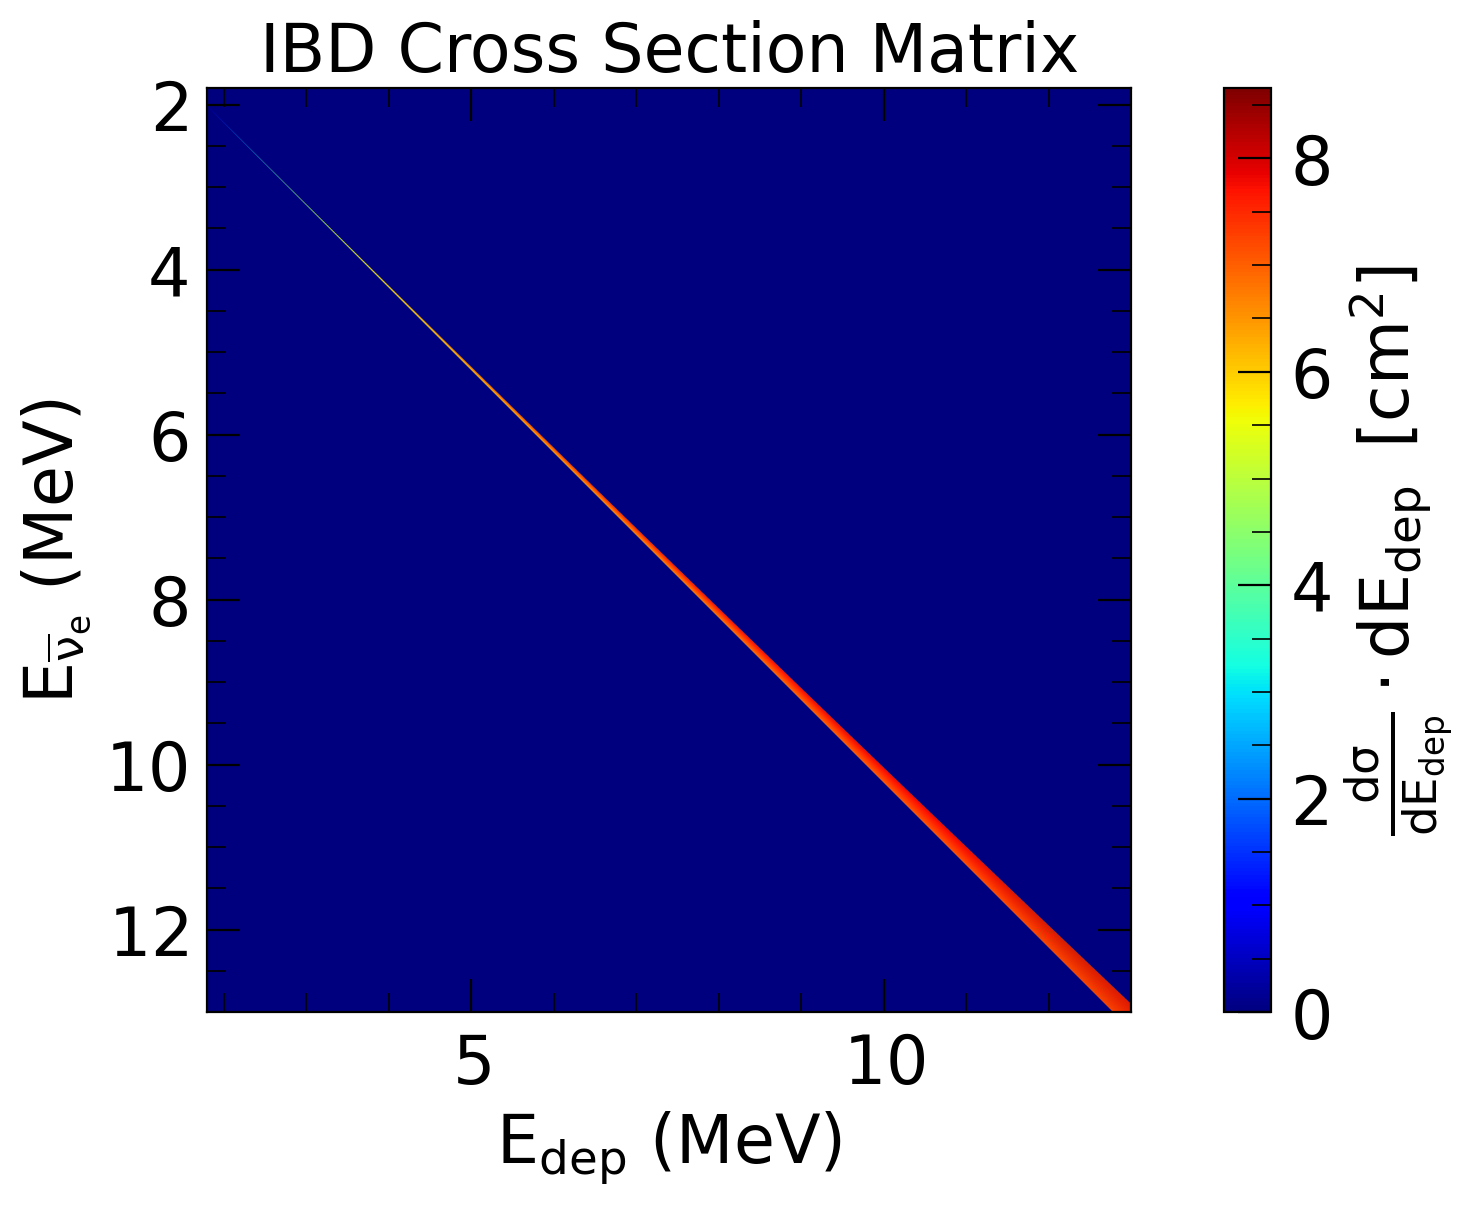

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.style.use("fitter/lib/Paper.mplstyle")

IBD_Xsec_matrix: torch.tensor = (
    torch.load("fitter/data/outputs/IBDXsec_matrix_enu5600.pt") * 1e44
)

E_min = 1.8
E_max = 13.0

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(
    IBD_Xsec_matrix,
    cmap="jet",
    extent=[E_min, E_max, E_max, E_min],
    # vmin=0,
    # vmax=10,
)

# colorbar label 改为正体
cbar = plt.colorbar(
    im,
    ax=ax,
    label=r"$\mathrm{\frac{d\sigma}{dE_{dep}} \cdot dE_{dep}\;\; [cm^2]}$",
)

ax.set_xlabel(r"$\mathrm{E_{dep}}$ (MeV)")
ax.set_ylabel(r"$\mathrm{E_{\overline{\nu}_e}}$ (MeV)")  # 修正纵坐标
ax.set_title("IBD Cross Section Matrix")

plt.show()


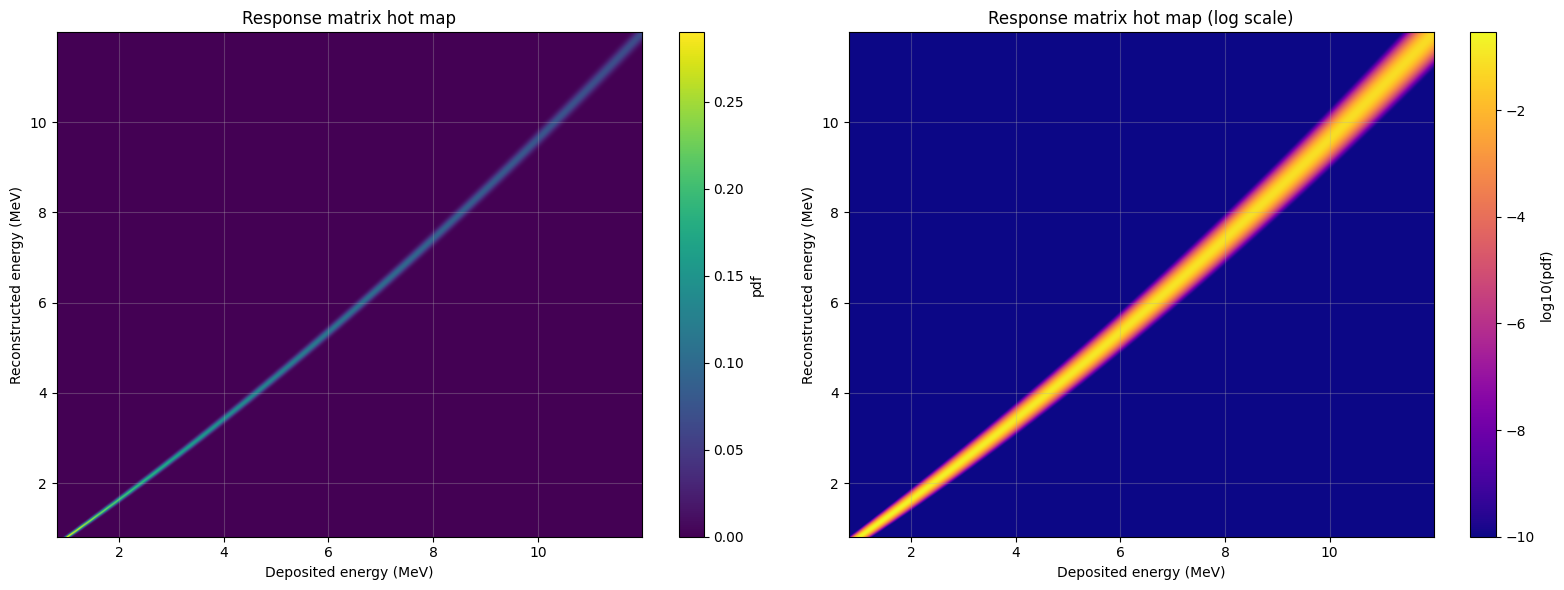

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. 完整热力图
im1 = ax1.imshow(
    response_np,
    aspect="auto",
    origin="lower",
    extent=[E_d_centers.min(), E_d_centers.max(), E_p_centers.min(), E_p_centers.max()],
    cmap="viridis",
)

ax1.set_xlabel("Deposited energy (MeV)")
ax1.set_ylabel("Reconstructed energy (MeV)")
ax1.set_title("Response matrix hot map")
ax1.grid(True, alpha=0.3)

# 添加颜色条
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label("pdf")

# 2. 对数尺度热力图（更好地显示小概率值）
im2 = ax2.imshow(
    np.log10(response_np + 1e-10),
    aspect="auto",
    origin="lower",
    extent=[E_d_centers.min(), E_d_centers.max(), E_p_centers.min(), E_p_centers.max()],
    cmap="plasma",
)

ax2.set_xlabel("Deposited energy (MeV)")
ax2.set_ylabel("Reconstructed energy (MeV)")
ax2.set_title("Response matrix hot map (log scale)")
ax2.grid(True, alpha=0.3)

# 添加颜色条
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label("log10(pdf)")

plt.tight_layout()
plt.show()

In [ ]:
from functools import lru_cache
import math

print("=== 默认 lru_cache（无容差）===")


@lru_cache(maxsize=2)
def f(x: float) -> float:
    print(f"Computing f({x!r})")
    return x * x


# 这两次会各自触发一次计算（缓存 miss），因为参数按精确值做键
y1 = f(0.1 + 0.2)  # 浮点表示约等于 0.30000000000000004
y2 = f(0.3)  # 精确为 0.3
print("values:", y1, y2)
print("cache info:", f.cache_info(), "\n")

print("=== 带容差的缓存键（量化成整数键）===")
# 思路：让缓存键基于“容差量化”的整数，而计算仍用原始 x
# 这样 0.1+0.2 和 0.3 在给定 tol 下映射到同一键，从而命中缓存


def _quantized_key(x: float, tol: float) -> int:
    # 将 x / tol 四舍五入到整数，作为稳定键
    return round(x / tol)


@lru_cache(maxsize=2)
def _f_with_key(key: int, x: float) -> float:
    # 注意：缓存键是 key，但依然用原始 x 计算，避免量化误差影响结果
    print(f"Computing f_tol(x={x!r}, key={key})")
    return x * x


def f_tol(x: float, tol: float = 1e-12) -> float:
    key = _quantized_key(x, tol)
    return _f_with_key(key, x)


# 在合适的 tol 下，两次只计算一次，第二次命中缓存
z1 = f_tol(0.1 + 0.2, tol=1e-12)
z2 = f_tol(0.3, tol=1e-12)
print("values:", z1, z2)
print("cache info:", _f_with_key.cache_info())

=== 默认 lru_cache（无容差）===
Computing f(0.30000000000000004)
Computing f(0.3)
values: 0.09000000000000002 0.09
cache info: CacheInfo(hits=0, misses=2, maxsize=2, currsize=2) 

=== 带容差的缓存键（量化成整数键）===
Computing f_tol(x=0.30000000000000004, key=300000000000)
Computing f_tol(x=0.3, key=300000000000)
values: 0.09000000000000002 0.09
cache info: CacheInfo(hits=0, misses=2, maxsize=2, currsize=2)


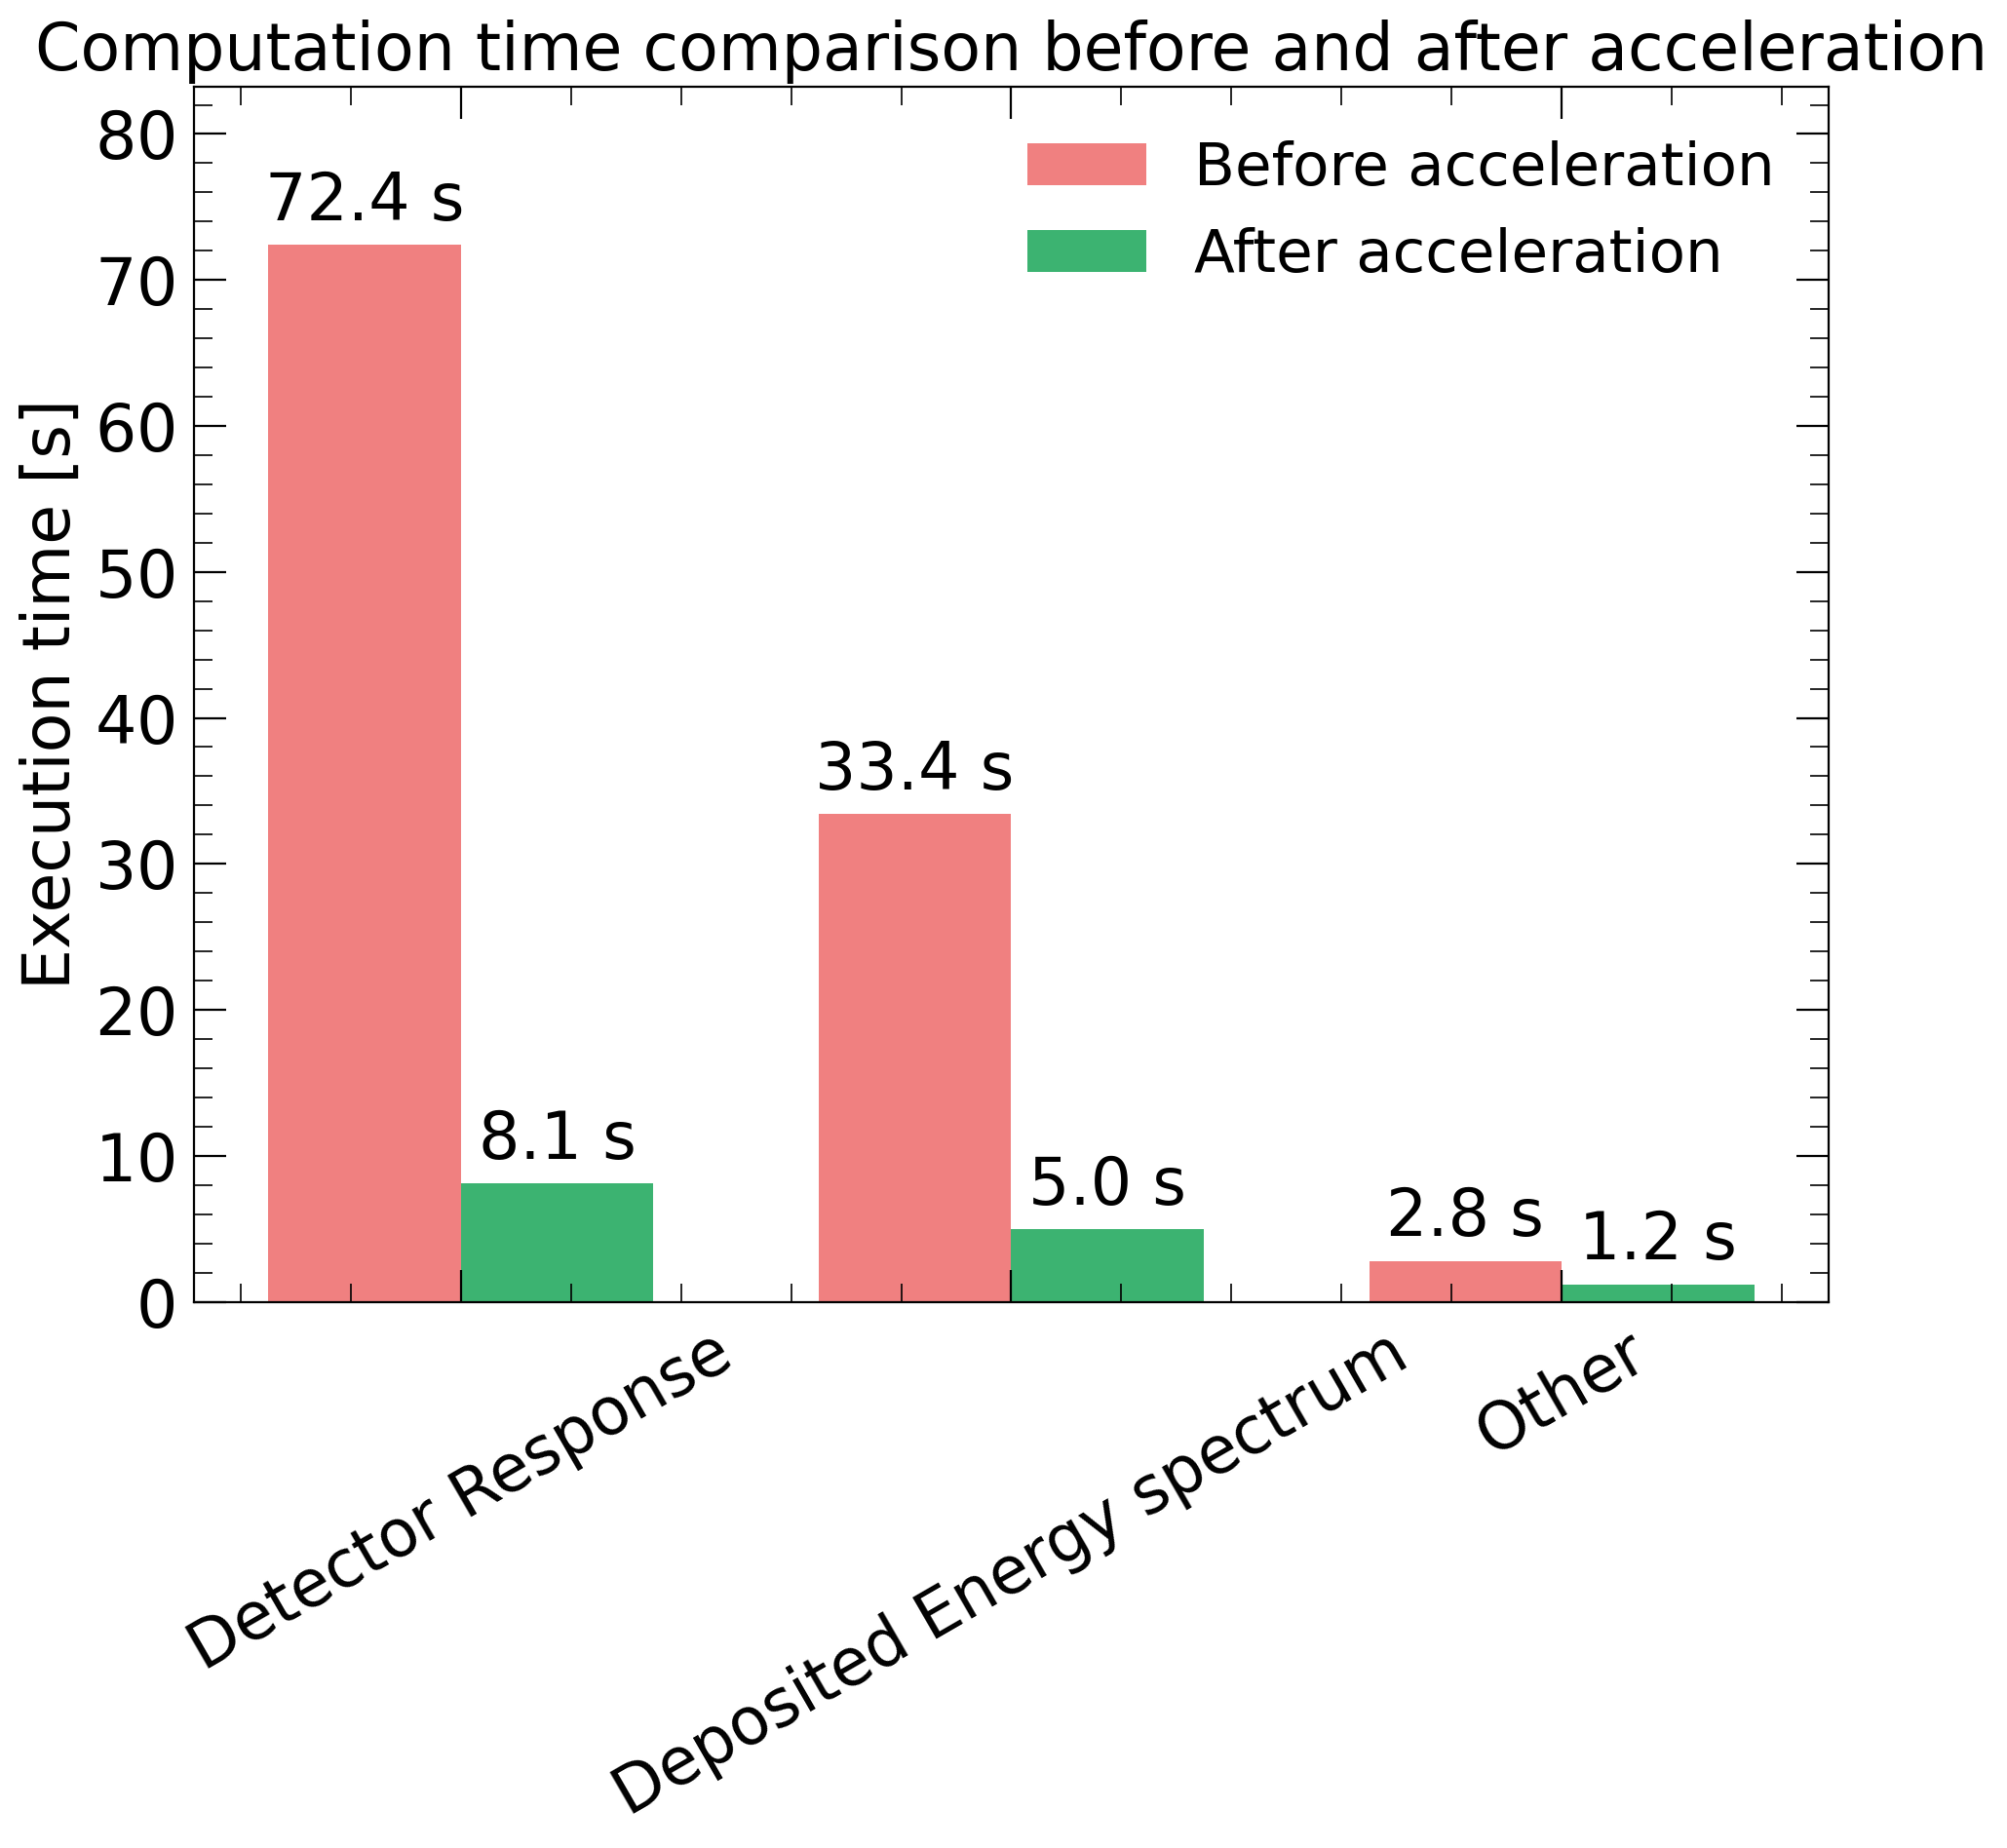

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("fitter/lib/Paper.mplstyle")

# 数据
labels = ["Detector Response", "Deposited Energy spectrum", "Other"]
before = [72.4, 33.4, 2.8]  # 加速前
after = [8.1, 5.0, 1.2]  # 加速后

x = np.arange(len(labels))  # x 轴位置
width = 0.35  # 柱形宽度

fig, ax = plt.subplots(figsize=(10, 10))

# 绘制柱形图
rects1 = ax.bar(
    x - width / 2, before, width, label="Before acceleration", color="lightcoral"
)
rects2 = ax.bar(
    x + width / 2, after, width, label="After acceleration", color="mediumseagreen"
)

# 添加标签、标题
ax.set_ylabel("Execution time [s]")
ax.set_title("Computation time comparison before and after acceleration")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha="center")  # ✅ 横坐标居中显示
ax.legend()

# ✅ 调整 y 轴上限，防止最高的 72.4 超出图框
ax.set_ylim(0, max(before) * 1.15)


# ✅ 在柱形上方标注具体数值（带单位）
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f"{height:.1f} s",  # 加单位 s
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 4),  # 向上偏移 4 像素
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
